<a href="https://colab.research.google.com/github/jaswanth2929/demo/blob/main/edavproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### question 1

In [8]:
df = pd.read_csv("employee_attrition (1).csv")

In [9]:
# Q1: Compute attrition rate by department
attrition_rate = df.groupby("department")["attrition"].apply(lambda x: (x=="Yes").mean() * 100)
print("Attrition Rate by Department (%):")
print(attrition_rate)
print("\n")


Attrition Rate by Department (%):
department
Finance      50.0
HR           50.0
IT           50.0
Marketing    50.0
Sales        50.0
Name: attrition, dtype: float64




# Q2: Analyze age-wise attrition trends

Age-wise Attrition Rate (%):
age
25    100.0
28      0.0
29    100.0
30    100.0
32      0.0
35      0.0
36      0.0
38    100.0
40    100.0
45      0.0
Name: attrition, dtype: float64


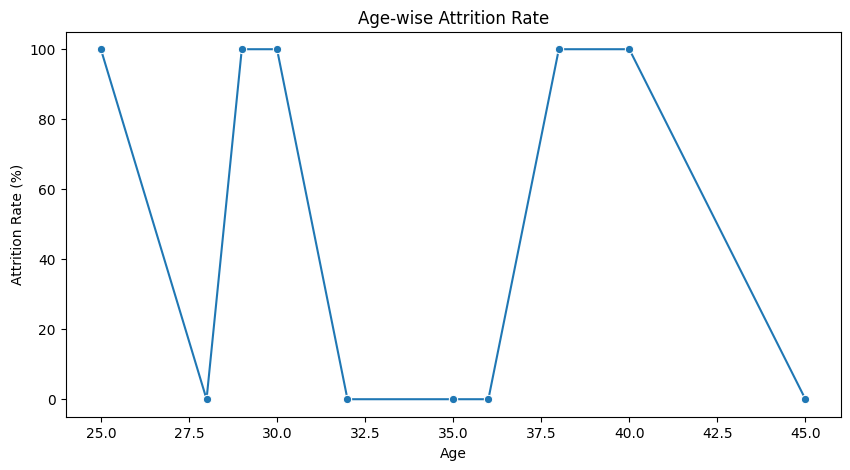

In [10]:
age_attrition = df.groupby("age")["attrition"].apply(lambda x: (x=="Yes").mean() * 100)
print("Age-wise Attrition Rate (%):")
print(age_attrition)

# Optional: Plot age-wise attrition
plt.figure(figsize=(10,5))
sns.lineplot(x=age_attrition.index, y=age_attrition.values, marker='o')
plt.title("Age-wise Attrition Rate")
plt.xlabel("Age")
plt.ylabel("Attrition Rate (%)")
plt.show()

# Q3: Replace missing salary values with median

In [11]:
if df['salary'].isnull().sum() > 0:
    median_salary = df['salary'].median()
    df['salary'].fillna(median_salary, inplace=True)
    print(f"Missing salaries replaced with median: {median_salary}")
else:
    print("No missing salary values.")

No missing salary values.


# Q4: Correlation between years_at_company and attrition
# Convert attrition to binary: Yes=1, No=0

In [12]:
df['attrition_binary'] = df['attrition'].map({'Yes':1, 'No':0})
correlation = df['years_at_company'].corr(df['attrition_binary'])
print(f"Correlation between years_at_company and attrition: {correlation:.2f}")

Correlation between years_at_company and attrition: -0.17


Q5: Plot attrition vs salary bracket and department-wise bar charts
# Create salary brackets

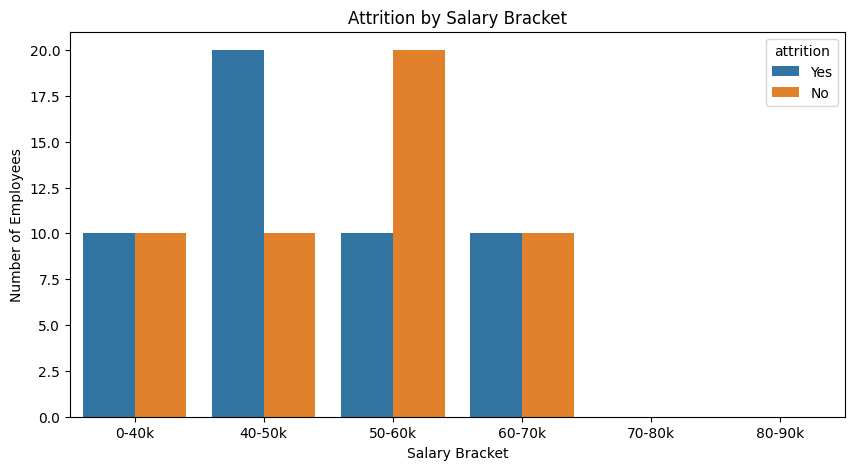

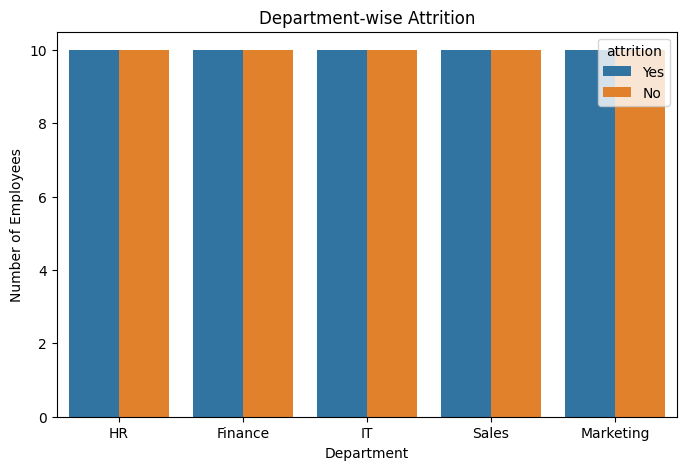

In [13]:
bins = [0, 40000, 50000, 60000, 70000, 80000, 90000]
labels = ['0-40k','40-50k','50-60k','60-70k','70-80k','80-90k']
df['salary_bracket'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Attrition vs salary bracket
plt.figure(figsize=(10,5))
sns.countplot(x='salary_bracket', hue='attrition', data=df)
plt.title("Attrition by Salary Bracket")
plt.xlabel("Salary Bracket")
plt.ylabel("Number of Employees")
plt.show()

# Department-wise attrition
plt.figure(figsize=(8,5))
sns.countplot(x='department', hue='attrition', data=df)
plt.title("Department-wise Attrition")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()